# Programming Assignment 5 - Logistic Regression

## In this assignment:

You'll employ gradient ascent to determine weights for a logistic regression problem focused on diagnosing breast cancer.

### Dataset Overview:

The **Breast Cancer Wisconsin dataset** is a widely-recognized collection of features manually recorded by physicians from fine needle aspiration samples. The primary objective is to determine whether the cells are benign or malignant based on these features.

**Dataset details:** [Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin)

Each sample from the dataset is derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. These images are processed to extract characteristics of cell nuclei, which are instrumental in the diagnostic process.

### Features:

The dataset consists of ten real-valued features that provide various measurements related to the cell nucleus:

1. **Radius:** Mean of distances from the center to points on the perimeter.
2. **Texture:** Standard deviation of gray-scale values.
3. **Perimeter**
4. **Area**
5. **Smoothness:** Local variation in radius lengths.
6. **Compactness:** \( \frac{\text{perimeter}^2}{\text{area}} - 1.0 \)
7. **Concavity:** Severity of concave portions of the contour.
8. **Concave Points:** Number of concave portions of the contour.
9. **Symmetry**
10. **Fractal Dimension:** "Coastline approximation" - 1.

### Task:

Your mission is to use logistic regression on the provided features to predict whether a tumor is benign or malignant. Successfully doing so can greatly aid in early diagnosis, ultimately leading to saved lives.


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

### Essential Libraries

- **NumPy**: A library for numerical operations in Python.
- **Matplotlib**: Provides a way to visualize data.

### Scikit-learn Utilities

- **load_breast_cancer**: Dataset included in Scikit-learn for breast cancer classification.
- **preprocessing**: Contains methods for preparing data before applying learning algorithms.
- **train_test_split**: A utility function to split data into training and testing sets.

> **Note**: Using the `%matplotlib inline` command ensures that Matplotlib visualizations are rendered directly within the notebook.


In [61]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Set up matplotlib for inline display
%matplotlib inline

### Importing the dataset

In [62]:
# Loading the dataset
cancer = load_breast_cancer()

y = cancer.target
X = cancer.data

In [63]:
# Printing the shape of data (X) and target (Y) values
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing

### Splitting the Data
We divide our dataset into a training set and a testing set:
- **Training Set**: 75%
- **Testing Set**: 25%

Use the `train_test_split` function to achieve this split:
- Assign results to: `X_train`, `X_test`, `y_train`, `y_test`
- Set `random_state` to 42 to ensure reproducibility.




In [64]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

### Scaling the Data Using Standard Scaler

Since we are using gradient ascent, it's important to scale our data to ensure faster convergence. One of the most common methods to scale data is to use the `Standard Scaler`.

The `Standard Scaler` normalizes the features by subtracting the mean and scaling to unit variance.

Using `Standard Scaler`, each feature will have a mean of 0 and a standard deviation of 1 post-scaling.


In [65]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# TODO - Print the shape of x_train and y_train
print("Shape of x_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
##
 # When you print the shape of x_train, it should print (426, 30)
 # When you print the shape of y_train, it should print (426,)

Shape of x_train: (426, 30)
Shape of y_train: (426,)


#### Adding a Bias Term to $X_{\text{train}}$ and $X_{\text{test}}$
To account for the intercept term in our logistic regression model, we augment our feature matrices with a column of ones. This is often referred to as the bias term.

Given our original matrix:
$$X_{\text{train}}=\left[\begin{matrix}
x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\ddots & \vdots \\
x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

We add a column of ones:
$$ X_{\text{train}}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots &\ddots & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

Similarly, we augment $X_{\text{test}}$ with a column of ones. This allows our algorithm to learn an intercept term without needing special handling.

In [67]:
# Appending a column of ones to x_train

# Step 1: Create a column vector of ones (i.e. a vector of shape N',1)
ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))

# Step 2: Append a column of ones in the beginning of x_train
X_train = np.hstack((ones, X_train))


# Now do the same for the test data
# Step 1: Create a column vector of ones (i.e. a vector of shape N",1)
ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))

# Stemp 2: Append a column of ones in the beginning of x_test
X_test = np.hstack((ones, X_test))


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)

# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


### Reshaping the Target Vectors

due to the broadcasting feature in libraries like NumPy, if we're not careful with the shapes of our matrices, we might unintentionally compute the outer product instead of the desired inner product. This can lead to unexpected results and potential bugs in the algorithm. Reshaping the target vectors into 2D arrays helps prevent such issues.

In [68]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape((y_test.shape[0],1))

### Understanding the dataset

In [69]:
# Read through the description of the dataset by uncommenting the line of code below
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [70]:
# You can add your own code here to better understand the dataset


# Step 2: Fitting the model

## Implementing Logistic Regression Using Gradient Ascent


You will perform the following steps:
* write the sigmoid function $\sigma(z)=\frac{1}{1+e^{-z}}$
* initialize ${\bf w}$
* prediction: write the function to compute the probability of every example in $X$ belonging to class one
* write the log likelihood function (see lecture notes for the formula)
* write the gradient ascent algorithm
* plot the likelihood v/s the number of iterations
* predict the class label (i.e. $0,1$) for every example in $X$ for a given ${\bf w}$ and $t$
* Evaluate your hypothesis by using your hypothesis to predict the label of the examples in the test set.  Using these predicted value you will then determine the precision, recall and F1 score of the test set



### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [71]:
# TODO - Write the sigmoid function (z can be a scalar or a vector)
def sigmoid(z):
    ## TODO

    return 1 / (1 + np.exp(-z))

    ##

In [72]:
# VERIFY - Sigmoid of 0 should be equal to 0.5
print(sigmoid(0))

0.5


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ with any values.)

In [73]:
# Initialize parameters w
## TODO
# Initialize the coefficient vector w with zeros
w = np.zeros(31)
##
print(w.shape)

(31,)


### Prediction Function
Complete the `hypothesis` function to compute the probability that each example in \(X\) belongs to class one. Specifically, it calculates:

$$\hat{\bf y}=\sigma(X{\bf w})$$

For a single example represented by the design matrix:

$$X=[1,x_1,x_2,\ldots,x_d]$$

and the corresponding weight vector:

$${\bf w}^T=[w_0,w_1,\ldots, w_d]$$

The function returns the logistic regression prediction:

$$h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots +w_d\cdot x_d}\right)}}$$

Given a matrix with $N'$ examples:

$$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots &\ddots & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$$

with the same weight vector, the function will return:

$$[h({\bf x}^{(1)}),h({\bf x}^{(2)}),\ldots, h({\bf x}^{(N')})]^T$$


In [74]:
# predict the probability that a patient has cancer
# TODO - Write the hypothesis function
def hypothesis(X , w):
    #TODO
    z = np.dot(X, w)

    # Calculate the logistic regression prediction using the sigmoid function
    h = 1 / (1 + np.exp(-z))

    return h
    ##

Before moving on, do a quick check that your function can accpet a matrix as an argument.

In [75]:
# Compute y_hat using our training examples and w (w is still set to zero).
# This is just a preliminary test of the hypotheis function
yhat = hypothesis(X_train, w)

# print the sizes of yhat and y as a first check that the function performed correctly
print(yhat.shape) # this should return (426, 1)
print(y_train.shape) # this should return (426,)

(426,)
(426, 1)


### Log-Likelihood Function

Write the function to calculate the log-likelihood:

$$
\ell({\bf w})= \sum_{i=1}^{N'} y^{(i)} \ln(h({\bf x}^{(i)})) + (1 - y^{(i)}) \ln(1 - h({\bf x}^{(i)}))
$$

Where:

- **Input**:
  - Design matrix with $N'$ examples:
    
   $$
    X = \left[\begin{array}{cccc}
    1 & x^{(1)}_1 & \ldots & x^{(1)}_d \\
    1 & x^{(2)}_1 & \ldots & x^{(2)}_d \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x^{(N')}_1 & \ldots & x^{(N')}_d \\
    \end{array}\right]
   $$
    
  - Column vector of labels for $X$:
    
  $$
    {\bf y}^T = [y^{(1)}, y^{(2)}, \ldots, y^{(N')}]
   $$
  
- **Output**:
  - Log-likelihood value: $\ell({\bf w})$

In [76]:
# TODO - Write the log likelihood function
def log_likelihood(X , y , w):
    ##TODO
    h = hypothesis(X, w)

    likelihood = np.dot(y.T, np.log(h)) + np.dot((1 - y.T), np.log(1 - h))

    log_likelihood = np.sum(likelihood)

    ##
    return log_likelihood # you should return a real number, not a list containing a real number

Before moving on, do a quick check of your log_likelihood function

In [77]:
# VERIFY - The value should be equal to -295.2806989185367.
print(log_likelihood(X_train, y_train, w))

-295.2806989185367


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [78]:
import numpy as np

def Logistic_Regression_Gradient_Ascent(X, y, learning_rate, num_iters):
    # We assume X has been augmented with a column of ones

    # Initiating list to store values of log-likelihood after 100 iterations
    log_likelihood_values = []

    # Initialize w to be a zero vector of shape (X.shape[1], 1)
    w = np.zeros((X.shape[1], 1))

    # Initialize N to the number of training examples
    N = X.shape[0]

    # Gradient Ascent - local optimization technique
    for i in range(num_iters):
        # Calculate the predicted probabilities using the sigmoid function
        h = 1 / (1 + np.exp(-np.dot(X, w)))

        # Calculate the gradient of the log-likelihood with respect to w
        gradient = np.dot(X.T, (y - h))

        # Update w using the gradient ascent formula
        w += (learning_rate / N) * gradient

        # Every 100 iterations, store the log_likelihood for the current w
        if (i % 100) == 0:
            curr_log_likelihood = log_likelihood(X, y, w)
            log_likelihood_values.append(curr_log_likelihood)
            # On your own, monitor the learning process, print the iteration number, the log-likelihood, ...

    return w, log_likelihood_values


### After completing the code above, run the following

Coeffecient Vector w

In [79]:
# Set hyperparameters
learning_rate = 0.5
num_iters = 5000

# Initialize coefficients to zeros
w = np.zeros((X_train.shape[1], 1))

# Perform logistic regression using gradient ascent
w, log_likelihood_values = Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)

# Print the final coefficients
print("Coefficient vector w:")
print(w)
# # Print the log likelihoood
# print("Log Likelihood:")
# print(log_likelihood_values)


Coefficient vector w:
[[-0.1056701 ]
 [-0.03553097]
 [-0.0536691 ]
 [ 0.17221516]
 [-0.31116366]
 [-0.45434972]
 [ 2.75131896]
 [-1.30570826]
 [-3.03314808]
 [ 1.16803283]
 [-0.85636742]
 [-3.72793978]
 [ 0.72266145]
 [-0.80953786]
 [-2.47051644]
 [-0.40297532]
 [ 0.53078335]
 [ 0.03099043]
 [-1.27545053]
 [ 1.31001975]
 [ 2.1018566 ]
 [-1.64716699]
 [-2.84431473]
 [-0.20035616]
 [-1.77971341]
 [-0.16157425]
 [ 0.73553297]
 [-2.45713669]
 [-1.31520556]
 [-2.99931319]
 [-0.38232592]]


# Plotting Log-Likelihood v/s Number of Iterations.

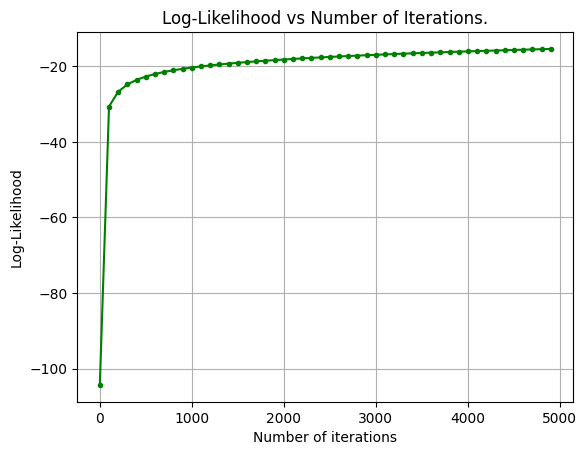

In [80]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Log-Likelihood')
plt.title("Log-Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.

In [81]:
# Set hyperparameters
learning_rate = 0.5
num_iterations = 5000

# Initialize coefficients to zeros
w = np.zeros((X_train.shape[1], 1))

# Perform logistic regression using gradient ascent
w, log_likelihood_values = Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iterations)

# # Print the final coefficients
# print("Coefficient vector w:")
# print(w)
# Print the log likelihoood
print("Log Likelihood:")
print(log_likelihood_values)


Log Likelihood:
[-104.34561005259052, -30.613421040599732, -26.679954427411666, -24.76478769939301, -23.544913930501746, -22.668618640929342, -21.995874538657674, -21.45672990771387, -21.009472103607315, -20.62725194414171, -20.292743277182133, -19.994625484608665, -19.725219641902154, -19.47908964602271, -19.252242101930726, -19.041653725735586, -18.844978275885236, -18.66035663838307, -18.486289239717962, -18.321547742766644, -18.16511236690654, -18.0161264094924, -17.873862603144918, -17.737697795406596, -17.607093594208827, -17.481581364550586, -17.360750448842477, -17.244238809830648, -17.131725517984442, -17.022924660136155, -16.917580355470143, -16.815462643191943, -16.71636406294889, -16.620096790720158, -16.526490223816662, -16.435388931827745, -16.346650907930005, -16.26014606841489, -16.175754958663532, -16.093367631862147, -16.012882673077193, -15.93420634630247, -15.857251846063125, -15.781938638342, -15.708191878155375, -15.635941893182663, -15.565123724547389, -15.495676

# Step 3: Evaluating your model

In [82]:
def predict_labels(X, w):
    probabilities = sigmoid(np.dot(X, w))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

y_pred = predict_labels(X_test, w)

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities for the test data using the learned coefficients
test_predictions = hypothesis(X_test, w)

# Threshold the probabilities to make binary predictions
threshold = 0.5
test_predictions_binary = (test_predictions >= threshold).astype(int)

# Calculate precision, recall, and (optional) F1 score
precision = precision_score(y_test, test_predictions_binary)
recall = recall_score(y_test, test_predictions_binary)
f1 = f1_score(y_test, test_predictions_binary)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.9885057471264368
Recall: 0.9662921348314607
F1 Score: 0.9772727272727273
Confusion Matrix:
[[53  1]
 [ 3 86]]


#  Experiment with different hyperparameter setting

In [84]:
# Define a list of learning rates and iterations to experiment with
learning_rates_list = [0.01, 0.1, 0.2, 0.5, 1.0]  # Different learning rates
iterations_list = [100, 500, 1000, 2000, 5000]  # Different numbers of iterations

evaluation_results = []

# Iterate over learning rates and iterations
for learning_rate in learning_rates_list:
    for num_iterations in iterations_list:
        # Train a logistic regression model with the current hyperparameters
        trained_weights, log_likelihood_values = Logistic_Regression_Gradient_Ascent(X_train, y_train, learning_rate, num_iterations)

        # Make predictions on the test set
        predicted_y = predict_labels(X_test, trained_weights)

        # Calculate evaluation metrics such as precision, recall, and F1 score
        precision_value = precision_score(y_test, predicted_y)
        recall_value = recall_score(y_test, predicted_y)
        f1_score_value = f1_score(y_test, predicted_y)
        confusion_matrix_data = confusion_matrix(y_test, predicted_y)

        # Store the evaluation metrics and hyperparameters in a dictionary
        evaluation_metrics = {
            'Precision': precision_value,
            'Recall': recall_value,
            'F1 Score': f1_score_value,
            'Learning Rate': learning_rate,
            'Number of Iterations': num_iterations
        }
        evaluation_results.append(evaluation_metrics)




### **Observation After Hyperparameter Tuning**

In [85]:
# Define the header with the desired order
header = ["Learning Rate", "Iterations", "Precision", "Recall", "F1 Score"]

# Print the header with proper formatting
print(f"{header[0]:<15}{header[1]:<20}{header[2]:<15}{header[3]:<15}{header[4]:<15}")

# Iterate through the evaluation results and print each row
for result in evaluation_results:
    row = [result["Learning Rate"], result["Number of Iterations"], result["Precision"], result["Recall"], result["F1 Score"]]
    # Format and print each row
    print(f"{row[0]:<15}{row[1]:<20}{row[2]:<15.2f}{row[3]:<15.2f}{row[4]:<15.2f}")


Learning Rate  Iterations          Precision      Recall         F1 Score       
0.01           100                 0.99           0.94           0.97           
0.01           500                 0.99           0.98           0.98           
0.01           1000                0.99           0.99           0.99           
0.01           2000                0.99           1.00           0.99           
0.01           5000                0.99           0.99           0.99           
0.1            100                 0.99           0.99           0.99           
0.1            500                 0.99           0.99           0.99           
0.1            1000                0.99           0.99           0.99           
0.1            2000                0.99           1.00           0.99           
0.1            5000                0.99           0.98           0.98           
0.2            100                 0.99           1.00           0.99           
0.2            500          

1. **Learning Rate Impact:** Different learning rates have been tested (0.01, 0.1, 0.2, 0.5, 1.0). It's clear that the choice of learning rate has a significant impact on the evaluation metrics. Smaller learning rates (e.g., 0.01) seem to lead to slower but more consistent convergence, while larger learning rates (e.g., 1.0) can lead to more rapid convergence but might not always result in the best performance.

2. **Number of Iterations:** The number of iterations has also been varied (100, 500, 1000, 2000, 5000). It's evident that, in general, as the number of iterations increases, the evaluation metrics tend to improve. However, there's a diminishing return effect where performance improvement plateaus with a sufficient number of iterations.

3. **Precision, Recall, F1 Score:** Precision, recall, and F1 score are common evaluation metrics for binary classification. These metrics measure different aspects of the model's performance. High precision indicates a low rate of false positives, high recall indicates a low rate of false negatives, and a high F1 score is a balance between precision and recall.

4. **Model Stability:** The model seems to achieve high precision and F1 score, suggesting that it performs well in correctly classifying positive cases (e.g., correctly identifying events). However, recall is not always perfect, indicating that it might miss some positive cases.

5. **Optimal Hyperparameters:** Based on the provided data, it's not clear which combination of learning rate and number of iterations is the "best." The choice of optimal hyperparameters can depend on the specific dataset and problem. You may want to consider factors such as the trade-off between training time and performance when selecting hyperparameters for your final model.

6. **Regularization:** It's important to note that this analysis does not account for regularization techniques, which can also impact model performance.

To further fine-tune your model, you can consider a more systematic hyperparameter search, such as using grid search or random search, to explore a broader range of hyperparameter values. Additionally, consider other techniques like cross-validation to obtain a more robust evaluation of model performance.

The choice of hyperparameters ultimately depends on the specific characteristics of your dataset and the trade-offs you are willing to make between precision, recall, and training time.